In [ ]:
# 1. Import Required Libraries

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [ ]:
#2. Upload / Access the Dataset

# Load dataset (e.g., MNIST dataset for simplicity)
(train_images, _), (test_images, _) = tf.keras.datasets.mnist.load_data()

# Normalize and reshape images
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
train_images = np.reshape(train_images, (len(train_images), 28, 28, 1))
test_images = np.reshape(test_images, (len(test_images), 28, 28, 1))

In [ ]:
# 3. Build the Encoder Model
# The encoder compresses the input image into a lower-dimensional latent representation.


# Encoder model
input_img = tf.keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# Latent representation has shape (7, 7, 16)

In [ ]:
# 4. Build the Decoder Model
# The decoder reconstructs the latent representation back into the original input shape.

# Decoder model
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [ ]:
# Full autoencoder model
autoencoder = models.Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the autoencoder
history = autoencoder.fit(train_images, train_images, epochs=1, batch_size=128, validation_split=0.2)


375/375 ━━━━━━━━━━━━━━━━━━━━ 86s 222ms/step - accuracy: 0.8028 - loss: 0.2465 - val_accuracy: 0.8150 - val_loss: 0.0842


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
Number of anomalies detected: 500


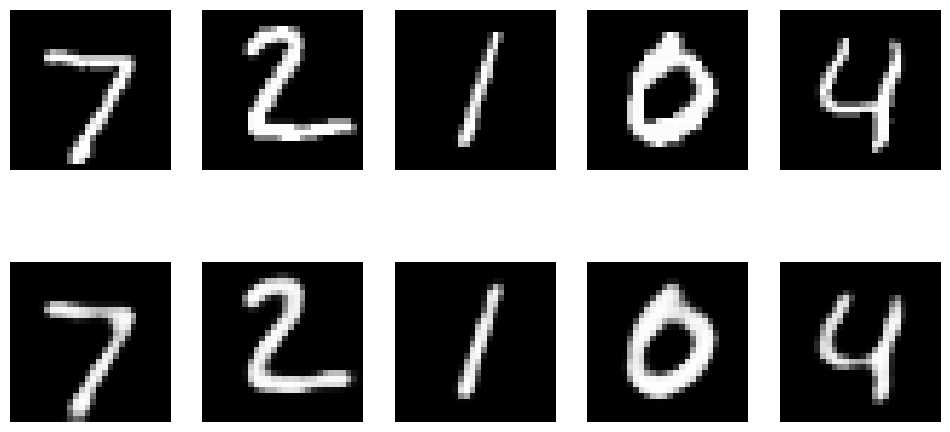

In [ ]:
# Reconstruct test images
reconstructed = autoencoder.predict(test_images)

# Calculate reconstruction error
mse = np.mean(np.square(test_images - reconstructed), axis=(1, 2, 3))

# Set threshold (e.g., 95th percentile of MSE)
threshold = np.percentile(mse, 95)

# Identify anomalies
anomalies = mse > threshold
print("Number of anomalies detected:", np.sum(anomalies))
print("")
print("")

# Display a few example images
plt.figure(figsize=(12, 6))
for i in range(5):
    # Display original images
    plt.subplot(2, 5, i + 1)

    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    # Display reconstructed images
    plt.subplot(2, 5, i + 6)
    plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()
